# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

"The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010" 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [55]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The objective is to determine which classiifer is strongest best suited for classifying if a client would subscribe a term deposit or not.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [57]:
df2 = df[df.columns[0:7]]
y = df['y']

In [58]:
X = pd.get_dummies(df2, columns = ['job', 'marital', 'education', 'default', 'housing','loan'], dtype=float)
X

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
41184,46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
41185,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
41186,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
X_train

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
8505,43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
28321,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2582,34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9407,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
33934,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11284,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
38158,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
860,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [62]:
y_train

8505      no
28321    yes
2582      no
9407      no
33934     no
        ... 
6265      no
11284     no
38158    yes
860       no
15795     no
Name: y, Length: 27595, dtype: object

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [63]:
import numpy as np

# Using np.unique to find unique values and their counts
values, counts = np.unique(y_train, return_counts=True)

# Finding the index of the maximum count
max_count_index = np.argmax(counts)

# The mode is the value at the index of the maximum count
mode = values[max_count_index]

# Calculating the percentage of the most frequent class
baseline_accuracy = (counts[max_count_index] / np.sum(counts)) * 100

print(f"The baseline performance to beat is: {baseline_accuracy:.2f}% accuracy.")

The baseline performance to beat is: 88.76% accuracy.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [64]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [65]:
score = log_model.score(X_train, y_train)
score

0.8875520927704295

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [66]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
import time

# Record the start time
start_time = time.time()
knn_model = KNeighborsClassifier().fit(X_train.values, y_train)
# Record the end time
end_time = time.time()

knn_score_train = knn_model.score(X_train.values, y_train)
knn_score_test = knn_model.score(X_test.values, y_test)
knn_time = end_time - start_time

start_time = time.time()
svm_model = SVC().fit(X_train, y_train)
end_time = time.time()

svm_score_train = svm_model.score(X_train, y_train)
svm_score_test = svm_model.score(X_test, y_test)

svm_time = end_time - start_time

start_time = time.time()
decision_model = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()

decision_score_train = decision_model.score(X_train, y_train)
decision_score_test = decision_model.score(X_test, y_test)
decision_time = end_time - start_time

In [69]:
start_time = time.time()
log_model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
end_time = time.time()

log_score_train = log_model.score(X_train, y_train)
log_score_test = log_model.score(X_test, y_test)
log_time = end_time - start_time

In [70]:
results_df = pd.DataFrame({'model': ['KNN', 'Decision Tree', 'Logistic Regression', 'SVC'], 'Train Time': [knn_time, decision_time, log_time, svm_time], 'Train Accuracy': [knn_score_train, decision_score_train, log_score_train, svm_score_train], 'Test Accurary': [knn_score_test, decision_score_test, log_score_test, svm_score_test]}).set_index('model')

print(type(results_df))
print(results_df.shape)

results_df

<class 'pandas.core.frame.DataFrame'>
(4, 3)


,Train Time,Train Accuracy,Test Accurary
model,,,
KNN,0.032239,0.891430,0.877952
Decision Tree,0.068685,0.919007,0.860958
Logistic Regression,0.482690,0.887552,0.886927
SVC,4.473826,0.887552,0.886927


In [71]:
log_model.score(X_train, y_train)

0.8875520927704295

In [72]:
svm_model.score(X_train, y_train)

0.8875520927704295

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Adding more features to train the models on to see if this enhances performance

In [130]:
df3 = df[['age', 'job','marital','education', 'default','housing','loan', 'pdays', 'day_of_week', 'previous', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx']]
# X_new = pd.get_dummies(df3, columns = ['job','marital','education', 'default','housing','loan', 'pdays', 'day_of_week', 'previous', 'campaign'], dtype=float)

X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.33, random_state=42)

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week', 'poutcome']

# Create transformers for the numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [132]:
def pipeline(estimator, name):
    return Pipeline([('preprocessor', preprocessor), ('select', SelectFromModel(estimator=LogisticRegression(max_iter=10000))), (name, estimator)])
    
pipeline(LogisticRegression(max_iter=10000, solver='liblinear'), 'log')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('select',
                 SelectFromModel(estimator=LogisticRegression(max_iter=10000))),
                ('log',
                 LogisticRegression(max_iter=10000, solver='liblinear'))])

In [133]:
from sklearn.metrics import make_scorer, precision_score
precision_scorer = make_scorer(precision_score, pos_label='yes')

params = {'log__C': [1,2,3,4,5,6,7,8]}

log_grid = GridSearchCV(estimator=pipeline(LogisticRegression(max_iter=10000, solver='liblinear'), 'log'), param_grid=params, scoring='accuracy')
log_grid.fit(X_train,y_train)

log_grid_score_train = log_grid.score(X_train, y_train)
log_grid_score_test = log_grid.score(X_test, y_test)
log_grid_score_test

0.8978886191422055

We can see that the log model is performing a bit better than it did before, this trend continues with the other models as well.

In [136]:
params = {'knn__n_neighbors': [3, 5, 7, 10, 13,16,19], 'knn__weights': ['uniform', 'distance']}

k_grid = GridSearchCV(estimator=pipeline(KNeighborsClassifier(),'knn'), param_grid=params, cv=5, scoring='accuracy').fit(X_train, y_train)

k_test_score = k_grid.score(X_test, y_test)
k_train_score = k_grid.score(X_train, y_train)
k_time = np.sum(k_grid.cv_results_['mean_fit_time']).mean()

k_test_score

0.8939895534466269

In [137]:
params = {'svc__kernel': ['rbf', 'poly', 'linear', 'sigmoid'], "svc__degree": [1,2,3], 'svc__decision_function_shape': ['ovo','ovr']}

svc_grid = GridSearchCV(estimator=pipeline(SVC(),'svc'), param_grid=params, cv=5, scoring='accuracy').fit(X_train, y_train)

svc_test_score = svc_grid.score(X_test, y_test)
svc_train_score = svc_grid.score(X_train, y_train)
svc_time = np.sum(svc_grid.cv_results_['mean_fit_time']).mean()

svc_test_score

0.8976679173103803

In [139]:
params = {'decision__criterion': ['gini', 'entropy','log_loss'], 'decision__max_depth': [3, 5, 10, 15, 20], 'decision__min_samples_split': [2, 5, 10, 20],
    'decision__min_samples_leaf': [1, 2, 5, 10]}

decision_grid = GridSearchCV(estimator=pipeline(DecisionTreeClassifier(),'decision'), param_grid=params, cv=5, scoring='accuracy').fit(X_train, y_train)

decision_score_train = decision_grid.score(X_train, y_train)
decision_score_test = decision_grid.score(X_test, y_test)
decision_time = np.sum(decision_grid.cv_results_['mean_fit_time']).mean()

In [140]:
log_time = np.sum(log_grid.cv_results_['mean_fit_time']).mean()

results_df = pd.DataFrame({'model': ['KNN', 'Decision Tree', 'Logistic Regression', 'SVC'], 'Train Time': [k_time, decision_time, log_time, svc_time], 'Train Accuracy': [k_train_score, decision_score_train, log_grid_score_train, svc_train_score], 'Test Accurary': [k_test_score, decision_score_test, log_grid_score_test, svc_test_score]}).set_index('model')

print(type(results_df))
print(results_df.shape)

results_df

<class 'pandas.core.frame.DataFrame'>
(4, 3)


,Train Time,Train Accuracy,Test Accurary
model,,,
KNN,2.617071,0.900308,0.893990
Decision Tree,48.624514,0.899547,0.897300
Logistic Regression,1.640910,0.898786,0.897889
SVC,139.982530,0.900344,0.897668


As we can see the model performs better overall but we can also notice an increase in the training time. Which makes sense since this time around we are using more features as well as GridSearchCVs to determine the best hyperparameters for each model. Next we will take a look at the roc_curve and roc_auc score to see what info we can derive from them. 

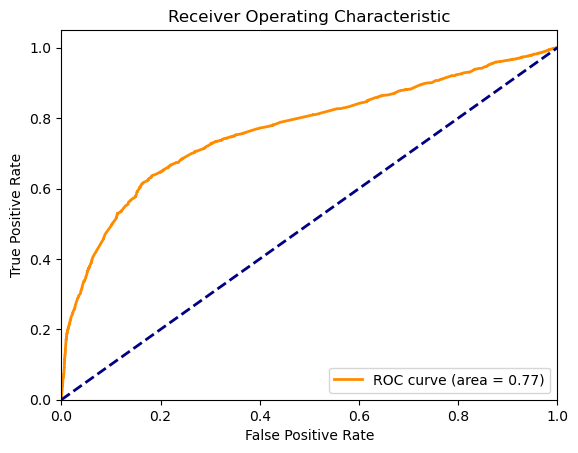

In [144]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_score = log_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='yes')
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score)

0.766062134027326

We see that the model is relatively decent at differentiating target values. 

In [165]:
from sklearn.metrics import precision_score, f1_score

f1_score(y_test, log_grid.predict(X_test), pos_label='yes')

0.30807577268195413

However as we can on the line above, the model performs poorly when assessing based on the f1 score. This is not what we want to see since that means there is a clear bias where our model is more likely to pick the majority class than the right class. These findings are reflected in the other models as well.

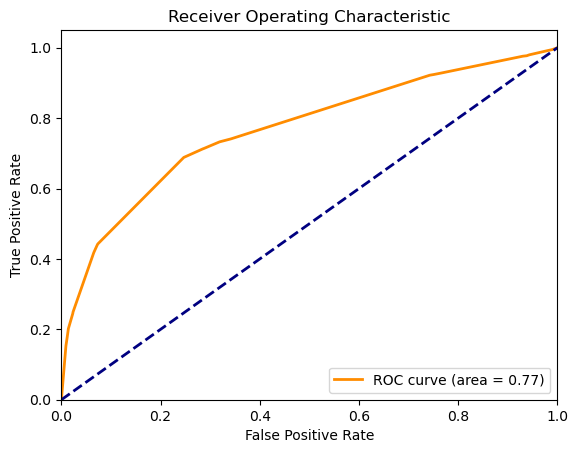

In [159]:
y_score = decision_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [160]:
roc_auc_score(y_test, y_score)

0.7673979356367314

In [166]:
f1_score(y_test, decision_grid.predict(X_test), pos_label='yes')

0.30753968253968256

In [ ]:
from sklearn.metrics import precision_score, f1_score

f1_score_log

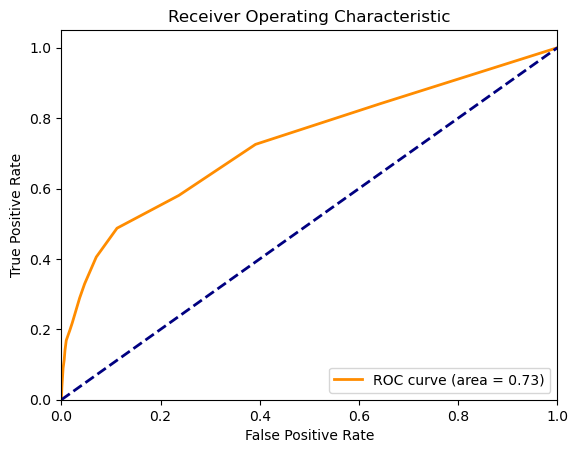

In [161]:
y_score = k_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [162]:
roc_auc_score(y_test, y_score)

0.7307116777527902

In [167]:
f1_score(y_test, k_grid.predict(X_test), pos_label='yes')

0.29810034096444227

In [169]:
# check the imbalance in the target data
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [181]:
df4 = df[['age', 'job','marital','education', 'default','housing','loan', 'pdays', 'day_of_week', 'previous', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx']]
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.33, random_state=42)


# Define your numerical and categorical features
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week', 'poutcome']

# Create transformers for the numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

f1_scorer = make_scorer(f1_score, pos_label='yes')

params = {'log__C': [1,2,3,4,5,6,7,8]}

log_grid = GridSearchCV(estimator=pipeline(LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced'), 'log'), param_grid=params, scoring=f1_scorer)
log_grid.fit(X_train,y_train)

log_grid_score_train = log_grid.score(X_train, y_train)
log_grid_score_test = log_grid.score(X_test, y_test)
log_grid_score_test

0.37958067456700084

In [179]:
df4.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'pdays', 'day_of_week', 'previous', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.conf.idx'], dtype=object)

Next, we will experiment with the models to see how we can improve our f1 scores. These changes didn't prove to be very significant but they did show us some indication that we were moving in the right direction.

In [182]:
params = {'decision__criterion': ['gini', 'entropy','log_loss'], 'decision__max_depth': [3, 5, 10, 15, 20], 'decision__min_samples_split': [2, 5, 10, 20],
    'decision__min_samples_leaf': [1, 2, 5, 10]}

decision_grid = GridSearchCV(estimator=pipeline(DecisionTreeClassifier(class_weight='balanced'),'decision'), param_grid=params, cv=5, scoring=f1_scorer).fit(X_train, y_train)

decision_score_train = decision_grid.score(X_train, y_train)
decision_score_test = decision_grid.score(X_test, y_test)
decision_time = np.sum(decision_grid.cv_results_['mean_fit_time']).mean()

decision_score_test

0.3995127892813642

In [204]:
from sklearn.metrics import precision_recall_curve
import numpy as np

probabilities = log_grid.predict_proba(X_test)[:, 1] 

# Get precision-recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities, pos_label='yes')

threshold = 0.65  # Example threshold

# Apply the threshold to the probabilities to create binary predictions
predictions = np.where(probabilities > threshold,'yes', 'no')

# Evaluate with this new prediction
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, pos_label = 'yes')

In [205]:
f1

0.43426966292134833

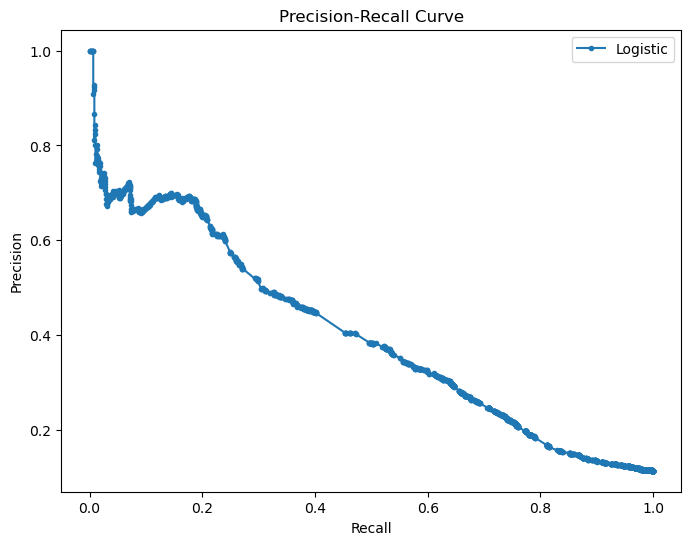

In [207]:
# Assuming probabilities_yes contains the probability scores of the positive class
precision, recall, thresholds = precision_recall_curve(y_test == 'yes', probabilities)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

As you can see this curve shows how poorly our mmodel is performing and suggests that further tinkering is necessary since the curve is bottom left leaning and not top right. 

In [208]:
# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and F1 score corresponding to the best index
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f"Best Threshold: {best_threshold}, F1 Score: {best_f1_score}")

Best Threshold: 0.6338202007954759, F1 Score: 0.4371497197758207


As this point we've seen some improvement in our score but we are no where satisfied with our results. After some research, we realized the next approach we should take is to resample the data. This proved to make a significant difference in our scores.

In [230]:
# First, separate your data into two DataFrames based on the class
df_majority = df[df.y == "no"]
df_minority = df[df.y == "yes"]

# Now, oversample the minority class by duplicating some entries
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True)

# Concatenate the majority class DataFrame with the oversampled minority class DataFrame
df_oversampled = pd.concat([df_majority, df_minority_oversampled], axis=0)

# Shuffle the DataFrame to mix up the row order
df_oversampled = df_oversampled.sample(frac=1).reset_index(drop=True)

X = df_oversampled[['age', 'job','marital','education', 'default','housing','loan', 'pdays', 'day_of_week', 'previous', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx']]

y = df_oversampled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [231]:
params = {'log__C': [1,2,3,4,5,6,7,8]}

log_grid = GridSearchCV(estimator=pipeline(LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced'), 'log'), param_grid=params, scoring=f1_scorer)
log_grid.fit(X_train, y_train)

log_grid_score_train = log_grid.score(X_train, y_train)
log_grid_score_test = log_grid.score(X_test, y_test)
log_grid_score_test

0.712661300626038

In [232]:
probabilities = log_grid.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, probabilities, pos_label='yes')

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and F1 score corresponding to the best index
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f"Best Threshold: {best_threshold}, F1 Score: {best_f1_score}")

Best Threshold: 0.4211423165282796, F1 Score: 0.7179937704656179


In [233]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, log_grid.predict(X_test))

0.7203599219264807

In [234]:
# Now, undersample the majority class to match the size of the minority class
df_majority_undersampled = df_majority.sample(len(df_minority))

# Concatenate the minority class DataFrame with the undersampled majority class DataFrame
df_undersampled = pd.concat([df_majority_undersampled, df_minority], axis=0)

# Shuffle the DataFrame to mix up the row order
df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True)

X = df_undersampled[['age', 'job','marital','education', 'default','housing','loan', 'pdays', 'day_of_week', 'previous', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx']]

y = df_undersampled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [235]:
params = {'log__C': [1,2,3,4,5,6,7,8]}

log_grid = GridSearchCV(estimator=pipeline(LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced'), 'log'), param_grid=params, scoring=f1_scorer)
log_grid.fit(X_train, y_train)

log_grid_score_train = log_grid.score(X_train, y_train)
log_grid_score_test = log_grid.score(X_test, y_test)
log_grid_score_test

0.717983651226158

In [236]:
probabilities = log_grid.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, probabilities, pos_label='yes')

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and F1 score corresponding to the best index
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f"Best Threshold: {best_threshold}, F1 Score: {best_f1_score}")

Best Threshold: 0.45819970001514654, F1 Score: 0.7248062015503877


In [237]:
balanced_accuracy_score(y_test, log_grid.predict(X_test))

0.7293147337989613

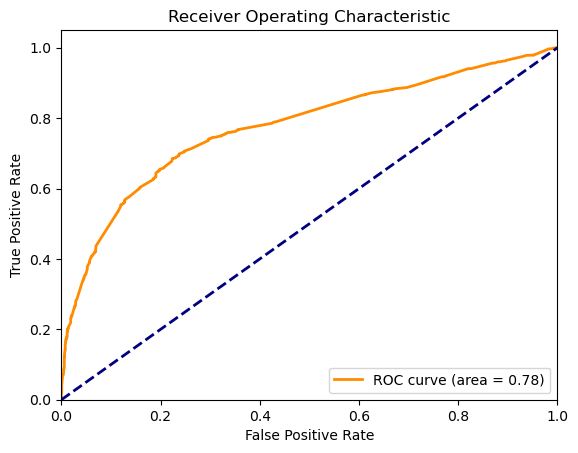

In [238]:
y_score = log_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [239]:
roc_auc_score(y_test, y_score)

0.7750142843741741

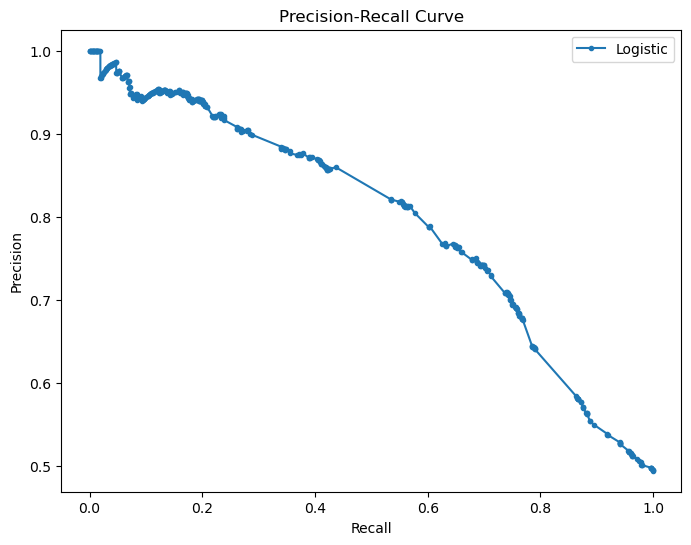

In [240]:
precision, recall, thresholds = precision_recall_curve(y_test == 'yes', y_score)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

We have successfully improved our models significant using resampling techniques to rebalance the data for less bias predictions. Although some more work could and should be done to further improve the model. This is a create starting point for making decent predictions for client subscription deposits. All in all, the best performing model based on scoring and fit time is the LogisticRegression model and it the model we should continue to tweak in order to produce even better results. My recommendations: Focus on using diffrent feature selection methods and hyperparameter testing to further optimize this model to achieve close to the baseline accuracy of 88%. 